# Useful snippets

Free OSM geocoder - place to coordinates (and zip code too!):

In [ ]:
import geocoder

g = geocoder.osm('University of Oxford, United Kingdom')
g.osm

{'x': -1.255807200927876,
 'y': 51.75805175000001,
 'addr:street': 'South Parks Road',
 'addr:city': 'Oxford',
 'addr:state': 'England',
 'addr:country': 'United Kingdom',
 'addr:postal': 'OX1 3TG'}

Function for converting coordinates in format x°y'z" E/W/N/S to decimal number to plot with matplotlib or plotly:

In [ ]:
def convert(old):
    direction = {'N':1, 'S':-1, 'E': 1, 'W':-1}
    if '°' not in old:
        old = '0°' + old
    new = old.replace('°',' ').replace('′',' ').replace('″',' ').replace('.',' ').replace('\'',' ').replace('"',' ')
    new = new.split()
    new_dir = new.pop()
    new.extend([0,0,0])
    return (int(new[0])+int(new[1])/60.0+int(new[2])/3600.0) * direction[new_dir[0]]

# Day 1. Points

Dataset: [Shipwrecks (Sunk ships)](https://www.kaggle.com/datasets/diaaessam/shipwrecks-sunk-ships)

Need this for exporting to images:

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Shipwrecks or Sunk ships.csv')
df.head()

Ship       Flag                     Sunk date  \
0  Black Assarca shipwreck    Unknown  Early 7th century (Presumed)   
1               Globe Star  Singapore                     27-Apr-73   
2                  Gulland       Aden                     13-Apr-51   
3                  Mtongwe   Tanzania                     27-Apr-94   
4                 Katina P     Greece                     26-Apr-92   

                                               Notes            Coordinates  
0  A wreck discovered at Black Assarca Island in ...                    NaN  
1      A cargo ship that ran aground off Mombasa.[1]   4°04′54″S 39°43′12″E  
2  A 545-ton Isles-class trawler built for World ...  04°02′50″S 39°43′57″E  
3  A Likoni and Mombasa route ferry that capsized...                    NaN  
4  An oil tanker that was damaged in a storm, spi...        25°35′S 32°59′E

Preprocessing:

In [ ]:
df = df.dropna()
df['Coordinates'] = df['Coordinates'].apply(lambda x: x.split('/')[0] if '/' in x else x)
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(' ', n=1, expand=True)

df = df[df['Latitude'].str.contains('S|N')]
df = df[df['Longitude'].str.contains('E|W')]

df['Latitude']  = df['Latitude'].apply(convert)
df['Longitude']  = df['Longitude'].apply(convert)
df.head()

Ship        Flag         Sunk date  \
1     Globe Star   Singapore         27-Apr-73   
2        Gulland        Aden         13-Apr-51   
4       Katina P      Greece         26-Apr-92   
5    Sunny South  Royal Navy  20 February 1861   
6  Achille Lauro       Italy          2-Dec-94   

                                               Notes            Coordinates  \
1      A cargo ship that ran aground off Mombasa.[1]   4°04′54″S 39°43′12″E   
2  A 545-ton Isles-class trawler built for World ...  04°02′50″S 39°43′57″E   
4  An oil tanker that was damaged in a storm, spi...        25°35′S 32°59′E   
5  An American-built extreme clipper sold to Hava...  13°02′53″S 45°11′42″E   
6  A cruise ship that was hijacked in 1985 by the...               2°N 47°E   

    Latitude  Longitude  
1  -4.081667  39.720000  
2  -4.047222  39.732500  
4 -25.583333  32.983333  
5 -13.048056  45.195000  
6   2.000000  47.000000

<ipython-input-7-99d91541cb12>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


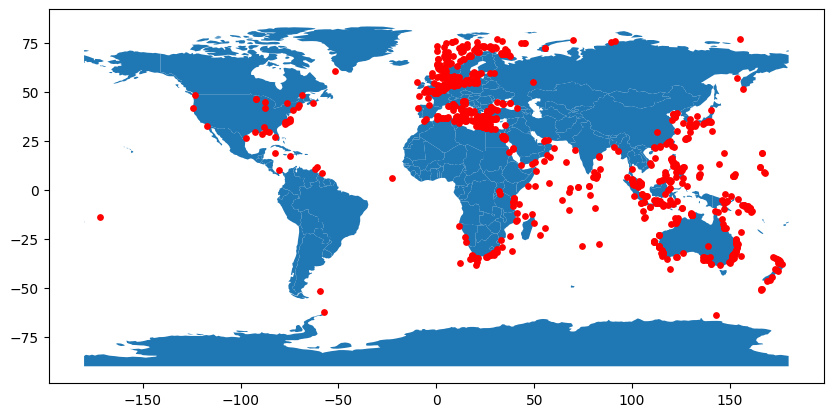

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

Sadly, function write_image works only with carto-darkmatter mapbox style. With my custom style it throws error. According to the Google, it's a bug that wasn't fixed yet.

In [ ]:
import plotly.express as px
import pandas as pd


fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Ship",
    hover_data=["Notes", "Flag"],
    color_discrete_sequence=["#FED414"],
    zoom=1,
    height=600,
)
# "mapbox://styles/tabbt/clofud9f5005m01r05o5masgb"
px.set_mapbox_access_token("pk.eyJ1IjoidGFiYnQiLCJhIjoiY2xmMjk1ZW42MGc2czN4bXRleGR5azZibiJ9.BV_KLSJShcbGBJZJ7BrQIQ")
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_bounds={"west": -20, "east": 50, "south": 29, "north": 90})
fig.update_traces(
        marker=dict(size=6)
    )
fig.write_image("day1.png", format='png', height=1400, width=1200, scale=4)
fig.write_image("day1.svg", format='svg', height=1400, width=1200, scale=4)
fig.show()

# Day 2. Lines

All variants were not very good, so I returned to using Mapbox. But still here are some useful pieces of code.

Data: https://data-canalrivertrust.opendata.arcgis.com/datasets/CanalRiverTrust::canals-by-km-length-20/about

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read in once
df_places = gpd.read_file('Canals.geojson')

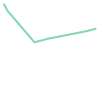

In [ ]:
df_places['geometry'][0]

<Axes: >

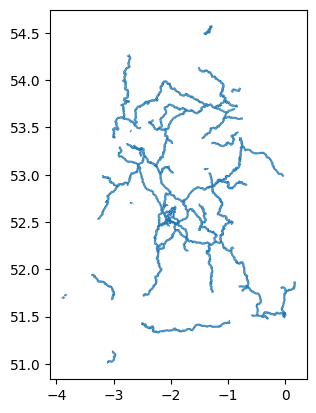

In [ ]:
df_places.plot()

In [ ]:
!pip3 install basemap

In [ ]:
!pip install  basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 2.0 MB/s eta 0:00:00


In [ ]:
df_places.head()

objectid functionallocation sapcanalcode           name  \
0         1             AB-001           AB    Albert Dock   
1         2             AC-001           AC    Abbey Creek   
2         3             AD-001           AD  Bank Dole Cut   
3         4             AI-001           AI     River Aire   
4         5             AI-002           AI     River Aire   

          sapnavstatus                  region  \
0      Fully Navigable              North West   
1  Partially Navigable     London & South East   
2      Fully Navigable  Yorkshire & North East   
3      Fully Navigable  Yorkshire & North East   
4      Fully Navigable  Yorkshire & North East   

                                 globalid       pub_regional_name  \
0  {3AD31531-77CA-4FFB-A813-65FB3A7E2B13}              North West   
1  {577A099D-6FD6-4B41-BEDA-77D7C17866E8}     London & South East   
2  {751FD61D-38AB-4405-9266-E18A905E3EE5}  Yorkshire & North East   
3  {EA6929A5-EE77-459A-99DD-097C3118C69C}  Yorkshire & North East   
4  {B0912FA0-1E8C-4B55-BA4D-C9465C7EA08D}  Yorkshire & North East   

   SHAPE_Length                                           geometry  
0      0.003435  MULTILINESTRING ((-2.99402 53.40132, -2.99398 ...  
1      0.003140  MULTILINESTRING ((-0.00069 51.52791, -0.00063 ...  
2      0.006307  MULTILINESTRING ((-1.23154 53.70948, -1.23117 ...  
3      0.012722  MULTILINESTRING ((-1.22543 53.70994, -1.22503 ...  
4      0.011933  MULTILINESTRING ((-1.21659 53.71445, -1.21633 ...

I like the colors, but struggled in plotting my geodata on a Basemap. Still it's a good variant, maybe will use it later.

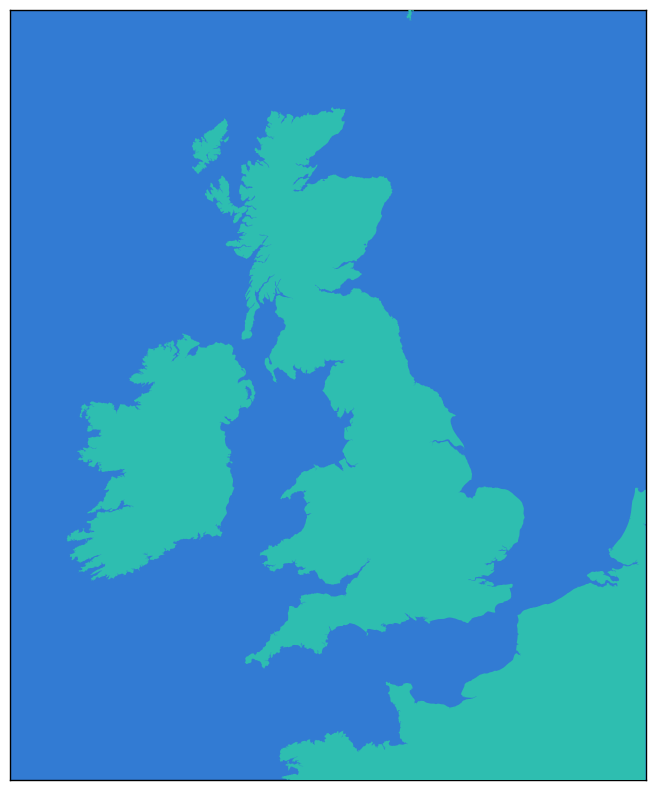

In [ ]:
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(10,10))  # plt.figure(figsize=(10,10))
####
map = Basemap(projection='merc', lat_0=49, lon_0=-123,
              resolution = 'h', area_thresh = 1000,
              llcrnrlon=-12, llcrnrlat=48,
              urcrnrlon=5, urcrnrlat=60,)
####

map.drawmapboundary(fill_color='#327BD3', zorder=1)
# map.drawcoastlines()
# map.drawcountries()
map.fillcontinents(color='#2EBEB0', zorder=2)

# df_places.plot(color='#FABFB7', figsize=(10,10))
df_places.to_crs(3857).plot(ax=ax, color='red', zorder=10)

plt.show()

In [ ]:
!pip install contextily

Looks like map from good old roadbook:

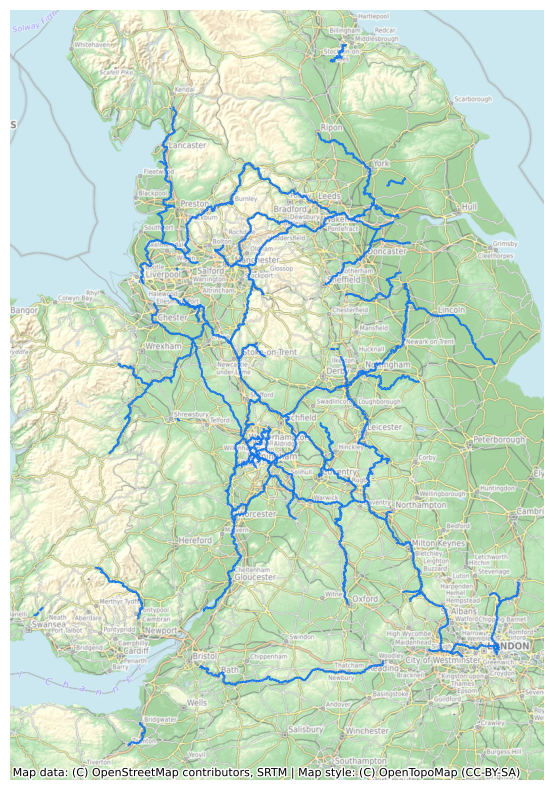

In [ ]:
import geopandas
import contextily as cx

df_wm = df_places.to_crs(epsg=3857)
ax = df_wm.plot(figsize=(10, 10), alpha=1, edgecolor="#1174E9")
ax.set_axis_off()
cx.add_basemap(ax, source=cx.providers.OpenTopoMap, alpha=0.5)

# Day 3. Polygons

Got data from OSM and plot it with Voronoi diagram (nearest subway station to every point inside cell)



In [ ]:
!pip install osmnx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

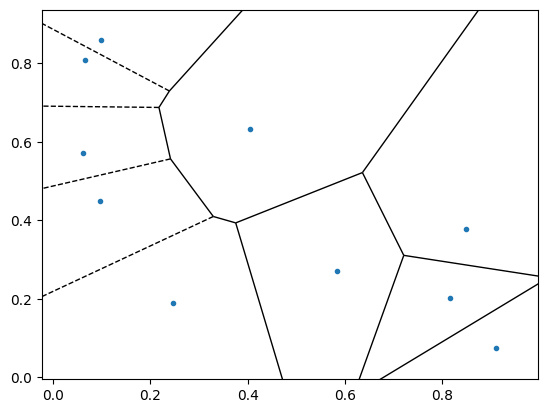

In [ ]:
rng = np.random.default_rng()
points = rng.random((10,2))
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices=False)
plt.show()

In [ ]:
from pyproj import CRS

place = 'Tokyo, Japan'

area = ox.geocode_to_gdf(place)
buildings = ox.features_from_place(place, {'station': ['subway']})

# projection = CRS.from_epsg(3067)

# buildings = buildings.to_crs(projection)
# area = area.to_crs(projection)

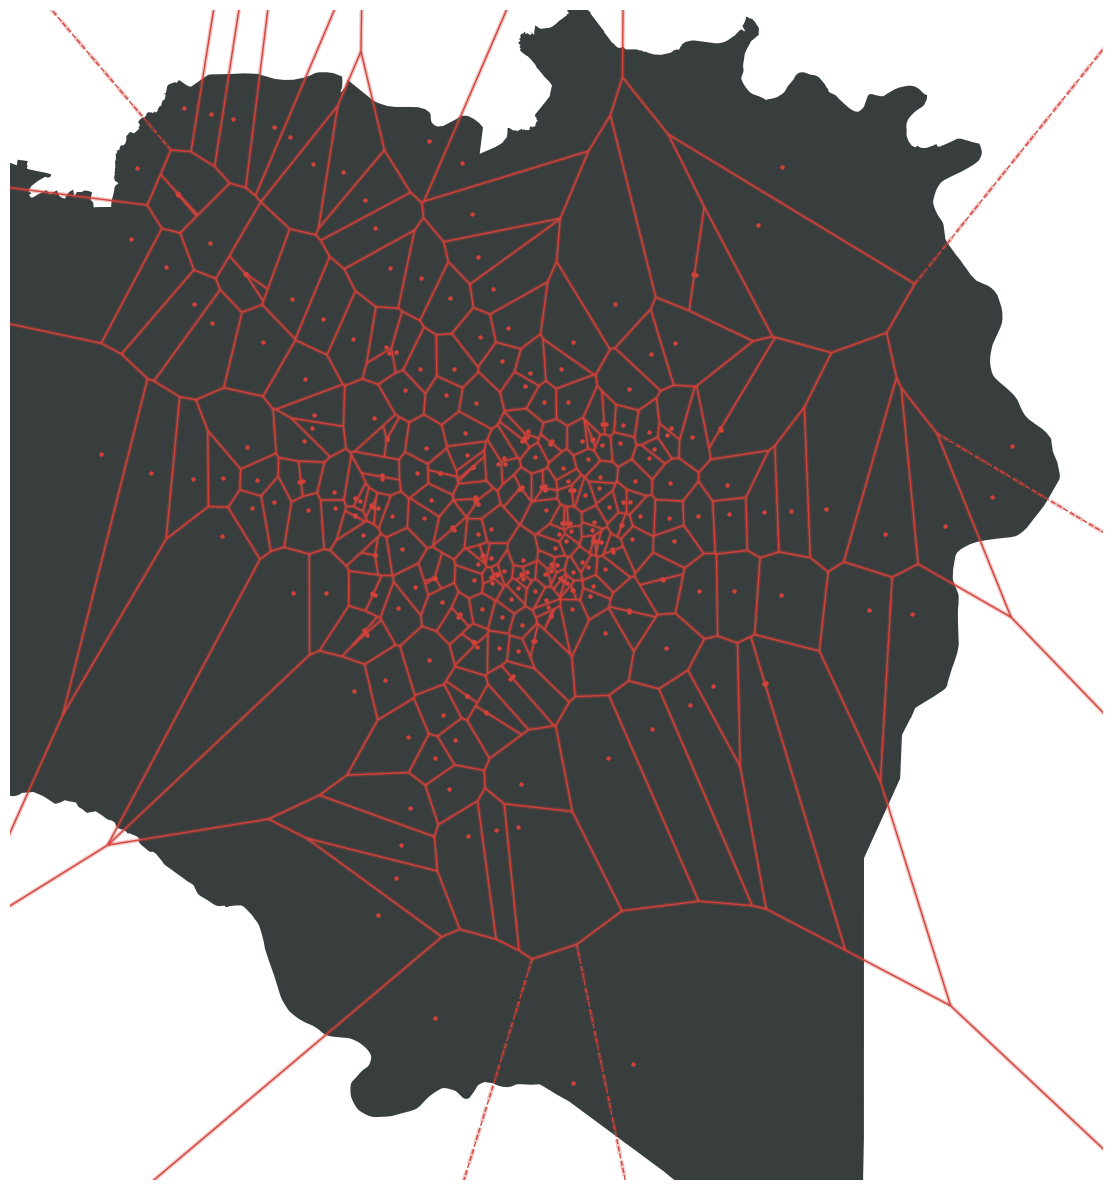

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
# fig, ax = ox.plot_footprints(buildings, figsize=(12,8), color='orange', bgcolor='white')
# fig, ax = ox.plot(buildings, figsize=(12,8), color='orange', bgcolor='white')
fig, ax = plt.subplots(figsize=(18,12))

bgcolor = '#383D3D'
color = '#D3423A'

area.plot(ax=ax, facecolor=bgcolor)
buildings.plot(ax=ax, facecolor=color, alpha=1, markersize=5)

points = [(x,y) for x,y in zip(buildings['geometry'].x , buildings['geometry'].y)]
vor = Voronoi(points)
voronoi_plot_2d(vor, show_vertices=False, show_points=False, ax=ax, line_colors=color, line_width=3, line_alpha=0.3)
voronoi_plot_2d(vor, show_vertices=False, show_points=False, ax=ax, line_colors=color, line_width=1)

plt.axis('off')
plt.tight_layout()

In [ ]:
fig.savefig("Metro.svg")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Day 4. A bad map

In [ ]:
!pip3 install basemap

In [ ]:
!pip install  basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 10.0 MB/s eta 0:00:00


I wanted to took a place with a lot of small lakes, but can't see them here on a Basemap. So the result was from mapbox/osm.

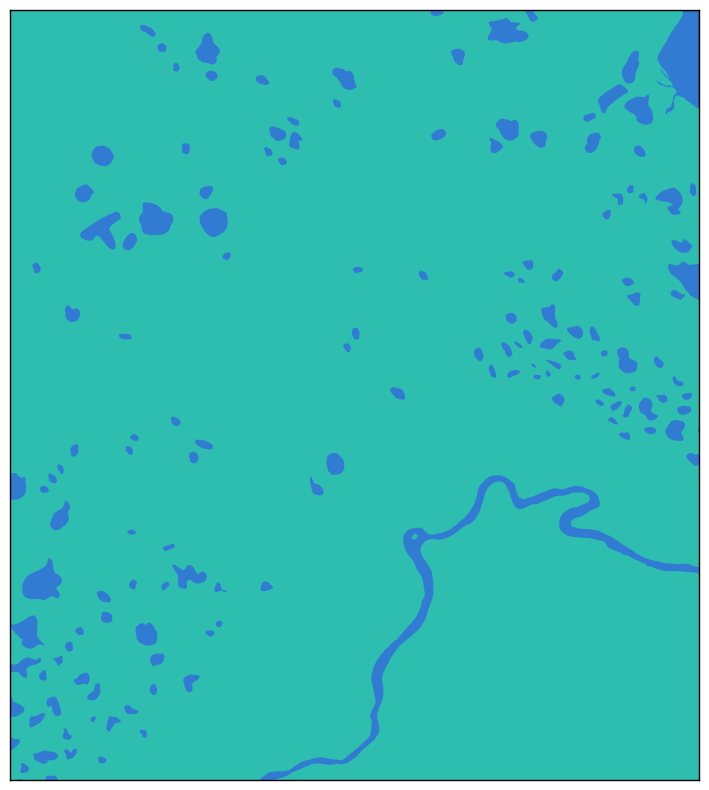

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))  # plt.figure(figsize=(10,10))
# 68.6249993,154.9091442
map = Basemap(projection='merc', lat_0=68.8947, lon_0=155.2313,
              resolution = 'f', area_thresh = 0,
              llcrnrlon=155, llcrnrlat=68,
              urcrnrlon=160, urcrnrlat=70)

map.drawmapboundary(fill_color='#327BD3')
# map.drawcoastlines()
# map.drawcountries()
map.fillcontinents(color='#2EBEB0')

plt.show()

# Day 5. Analog map

No computer!!!

# Day 6. Asia

In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox

place_name = 'Hong Kong'

gdf = ox.geometries_from_place(place_name, tags={'building':True, 'levels': True})

<ipython-input-85-c033213c3ee4>:5: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place_name, tags={'building':True, 'levels': True})


In [ ]:
gdf = ox.geometries_from_bbox(31.22, 31.20, 121.375, 121.42, tags={'building':True, 'levels': True})

<ipython-input-77-0be3d54ba9fd>:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_bbox(31.22, 31.20, 121.375, 121.42, tags={'building':True, 'levels': True})


In [ ]:
levels_gdf = gdf.dropna(subset=['building:levels'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
levels_gdf['building:levels'].unique()

array(['1', '24', '3', '90', '12', '21', '10', '5', '25', '50', '33',
       '35', '26', '27', '2', '22', '7', '52', '6', '36', '58', '62',
       '41', '51', '57', '4', '53', '8', '23', '14', '20', '69', '73',
       '11', '29', '9', '38', '28', '65', '31', '44', '48', '46', '63',
       '19', '17', '18', '15', '39', '37', '30', '68', '34', '32', '43',
       '42', '49', '61', '40', '47', '45', '16', '13', '55', '54', '0',
       '0,1,2,3,4,5,6', '0,1,2,3,4', '0,1,2,3,4,5', '59', '78', '0.5',
       'G', '21;24', '2,3,4,5,6'], dtype=object)

In [ ]:
levels_gdf = levels_gdf[~levels_gdf['building:levels'].isin(['彭树林编辑的测试数据', '13Yunei river Yunei river', 'q'])]
levels_gdf['building:levels'] = levels_gdf['building:levels'].apply(lambda x: x.replace(';', ',').split(',')[-1])
levels_gdf['building:levels'] = levels_gdf['building:levels'].apply(lambda x: int(float(x)) if x != 'G' else 0)

levels_gdf['building:levels'].unique()

array([ 1, 24,  3, 90, 12, 21, 10,  5, 25, 50, 33, 35, 26, 27,  2, 22,  7,
       52,  6, 36, 58, 62, 41, 51, 57,  4, 53,  8, 23, 14, 20, 69, 73, 11,
       29,  9, 38, 28, 65, 31, 44, 48, 46, 63, 19, 17, 18, 15, 39, 37, 30,
       68, 34, 32, 43, 42, 49, 61, 40, 47, 45, 16, 13, 55, 54,  0, 59, 78])

I've tried to plot heights of skyscrapers, but it's not looking cool. Not much data with levels attr and the height doesn't vary much

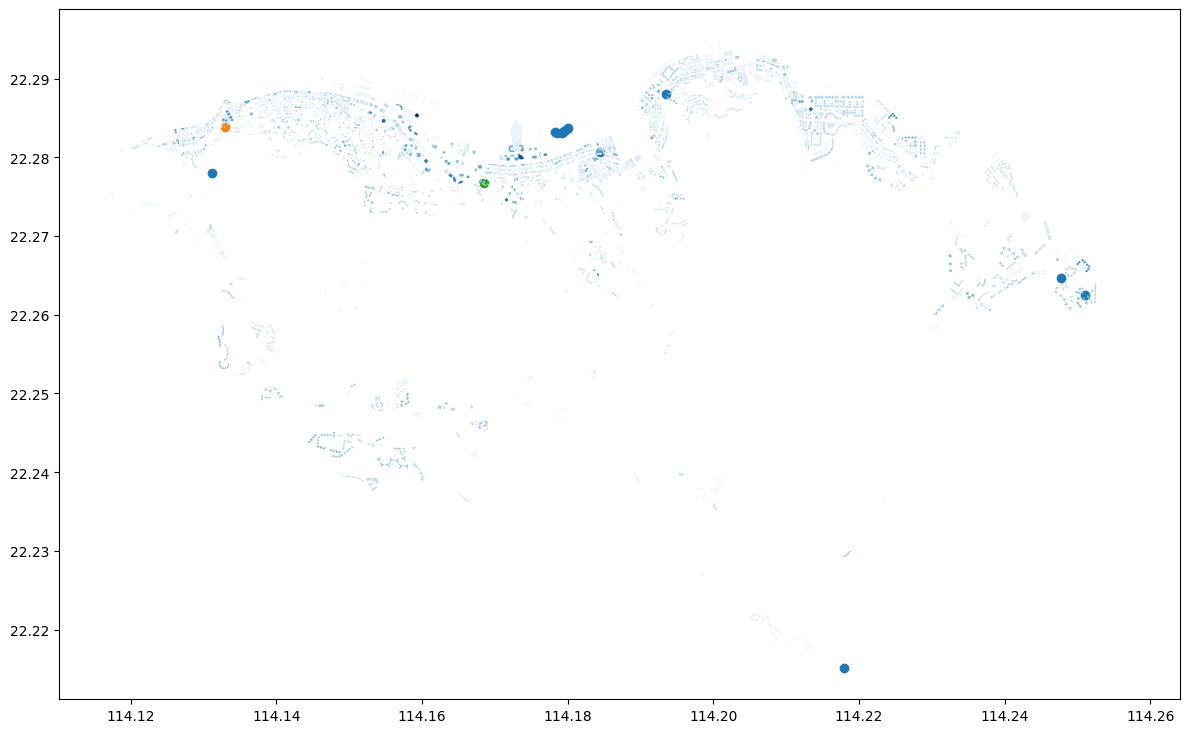

In [ ]:
import matplotlib.pyplot as plt

colormap = plt.get_cmap('Blues')

fig, ax = plt.subplots(figsize=(12, 8))
for i in list(levels_gdf['building:levels'].unique()):
  step = levels_gdf[levels_gdf['building:levels'] == i]
  # ox.plot_footprints(step, ax=ax, color=colormap(i), bgcolor='white')
  step.plot(ax=ax, facecolor=colormap(i/levels_gdf['building:levels'].max()))

plt.tight_layout()
plt.show()

So let's practice some R. I haven't got enough time to create smth interesting, so a least it could be something nice-looking

Code taken from this tutorial: http://estebanmoro.org/post/2020-10-19-personal-art-map-with-r/

In [ ]:
install.packages("osmdata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proj4’, ‘PROJ’, ‘crsmeta’, ‘Rcpp’, ‘reproj’




In [ ]:
library(osmdata)
bbx <- getbb("Manila, Philippines")

In [ ]:
bbx["x", "min"] <- 120.936470
bbx["x", "max"] <- 121.063843
bbx["y", "min"] <- 14.531745
bbx["y", "max"] <- 14.660322

In [ ]:
bbx

min       max      
x 120.93647 121.06384
y  14.53175  14.66032

In [ ]:
min_lon <- bbx["x", "min"]; max_lon <- bbx["x", "max"];
min_lat <- bbx["y", "min"]; max_lat <- bbx["y", "max"];
bbx <- rbind(x=c(min_lon,max_lon),y=c(min_lat,max_lat))
colnames(bbx) <- c("min","max")

In [ ]:
available_tags("highway")

Key     Value                 
1  highway bridleway             
2  highway bus_guideway          
3  highway bus_stop              
4  highway busway                
5  highway construction          
6  highway corridor              
7  highway crossing              
8  highway cycleway              
9  highway elevator              
10 highway emergency_access_point
11 highway emergency_bay         
12 highway escape                
13 highway footway               
14 highway give_way              
15 highway living_street         
16 highway milestone             
17 highway mini_roundabout       
18 highway motorway              
19 highway motorway_junction     
20 highway motorway_link         
21 highway passing_place         
22 highway path                  
23 highway pedestrian            
24 highway platform              
25 highway primary               
26 highway primary_link          
27 highway proposed              
28 highway raceway               
29 highway residential           
30 highway rest_area             
31 highway road                  
32 highway secondary             
33 highway secondary_link        
34 highway service               
35 highway services              
36 highway speed_camera          
37 highway steps                 
38 highway stop                  
39 highway street_lamp           
40 highway tertiary              
41 highway tertiary_link         
42 highway toll_gantry           
43 highway track                 
44 highway traffic_mirror        
45 highway traffic_signals       
46 highway trailhead             
47 highway trunk                 
48 highway trunk_link            
49 highway turning_circle        
50 highway turning_loop          
51 highway unclassified          
52 highway User Defined          
53 highway via_ferrata

In [ ]:
highways <- bbx %>%
  opq()%>%
  add_osm_feature(key = "highway",
                  value=c("motorway", "trunk",
                          "primary","secondary",
                          "tertiary","motorway_link",
                          "trunk_link","primary_link",
                          "secondary_link",
                          "tertiary_link")) %>%
  osmdata_sf()

In [ ]:
install.packages("sf")
library(sf)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE



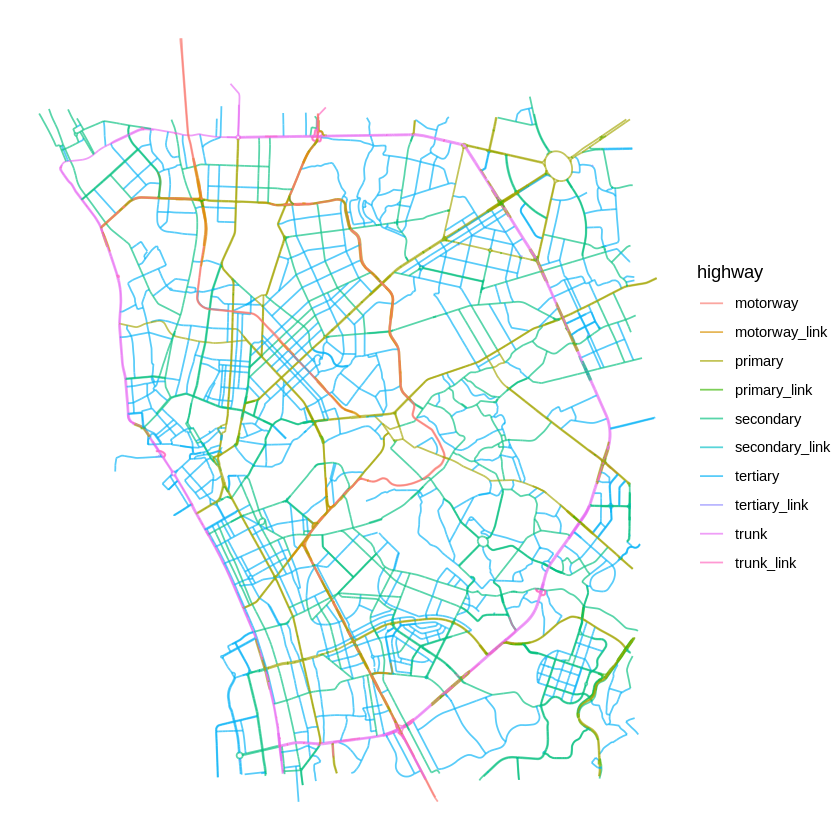

In [ ]:
require(sf)
ggplot() +
  geom_sf(data = highways$osm_lines,
          aes(color=highway),
          size = .4,
          alpha = .65)+
  theme_void()

In [ ]:
streets <- bbx %>%
  opq()%>%
  add_osm_feature(key = "highway",
                  value = c("residential", "living_street",
                            "service","unclassified",
                            "pedestrian", "footway",
                            "track","path")) %>%
  osmdata_sf()

Looks really nice, no need to plot anything else. Happy with default ggplot colors

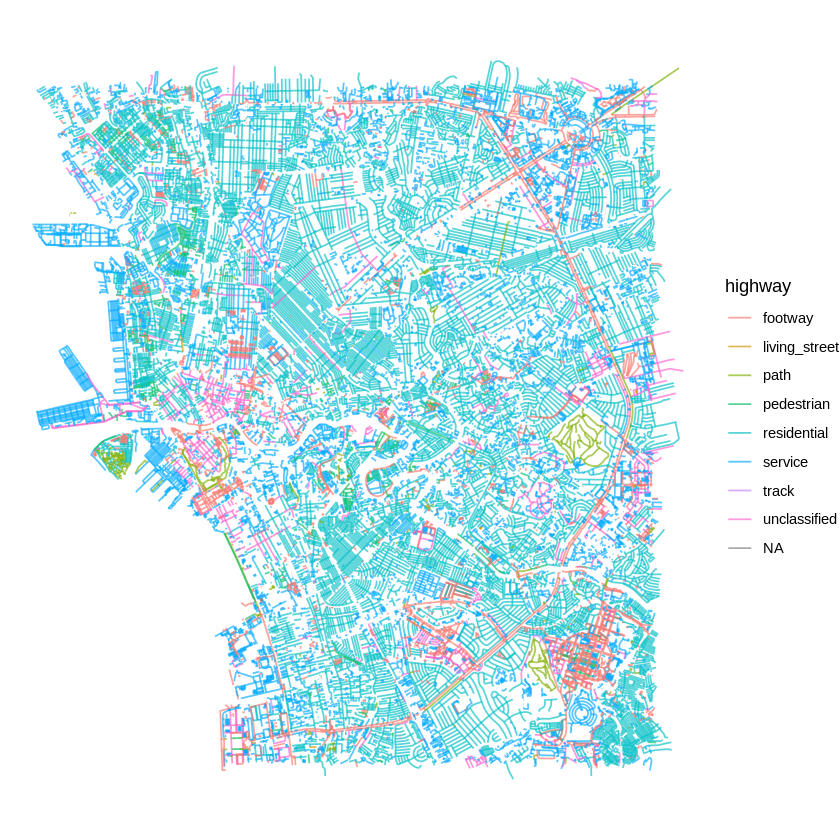

In [ ]:
ggplot() +
  geom_sf(data = streets$osm_lines,
          aes(color=highway),
          size = .4,
          alpha = .65)+
  theme_void()

In [ ]:
ggsave("manila_roads.png", device = 'png', dpi = 'print')

Saving 6.67 x 6.67 in image


# Day 7. Navigation

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
df_places = gpd.read_file('map3.geojson')
roads_list = []
for i in range(1,5):
  df = gpd.read_file(f"r{i}.geojson")
  # df = df.to_crs(epsg=3857)
  roads_list.append(df)

In [ ]:
!pip install contextily

In [ ]:
joined = pd.concat([roads_list[0], roads_list[1], roads_list[2], roads_list[3], df_places])

After creating merged geojson, I've added it to Mapbox and did some styling. Was really short of time, so nothing creative :(

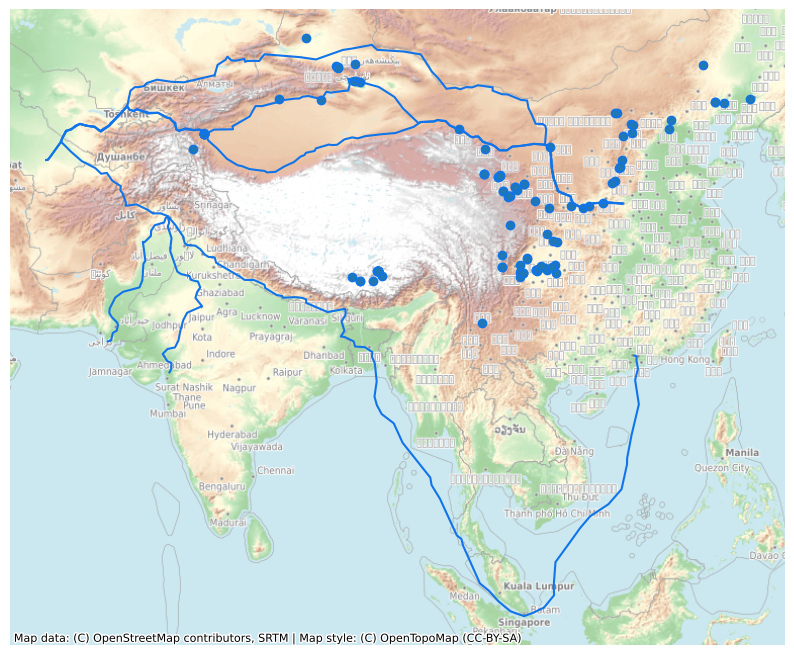

In [ ]:
ax = joined.plot(figsize=(10, 10), alpha=1, edgecolor="#1174E9")

ax.set_axis_off()
cx.add_basemap(ax, source=cx.providers.OpenTopoMap, alpha=0.5)

In [ ]:
joined.to_file("silk.geojson", driver="GeoJSON")

# Day 8. Africa

Followed this tutorial: https://hohenfeld.is/posts/streetmaps-in-r-with-ggplot2/

In [ ]:
install.packages("osmdata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(osmdata)
library(ggplot2)
library("sf")
library("dplyr")

Adjusting the box to make picture more symmetric

In [ ]:
location <- getbb("Cairo, Egypt", featuretype = "city")
location['x', 'min'] <- 29.8
location['x', 'max'] <- 31.6
location['y', 'max'] <- 30.25
location

min      max  
x 29.80000 31.60
y 29.74831 30.25

In [ ]:
dus_streets <- location %>%
  opq() %>%
  add_osm_feature(key = "highway",
                  value = c("motorway", "trunk",  "primary",
                            "secondary", "tertiary")) %>%
  osmdata_sf()

In [ ]:
small_streets <- location %>%
  opq() %>%
  add_osm_feature(
    key = "highway",
    value = c("residential", "living", "unclassified",
              "service", "footway")) %>%
  osmdata_sf()

In [ ]:
water <- location %>%
  opq() %>%
  add_osm_feature(key = "waterway", value = "river") %>%
  osmdata_sf()

In [ ]:
boundaries <- location %>%
  opq() %>%
  add_osm_feature(key = "admin_level", value = "6") %>%
  osmdata_sf()

In [ ]:
boundaries

Object of class 'osmdata' with:
                 $bbox : 29.7483062,29.8,30.25,31.6
        $overpass_call : The call submitted to the overpass API
                 $meta : metadata including timestamp and version numbers
           $osm_points : 'sf' Simple Features Collection with 0 points
            $osm_lines : NULL
         $osm_polygons : 'sf' Simple Features Collection with 0 polygons
       $osm_multilines : NULL
    $osm_multipolygons : NULL




Nile divides into two rivers, so add their names too (names from OSM)

In [ ]:
small_water <- water$osm_lines %>%
  filter(name != "نهر النيل" & name != "Nile" & name != "فرع دمياط" & name != "فرع رشيد")

nile <- water$osm_lines %>%
  filter(name == "نهر النيل" | name == "Nile" | name == "فرع دمياط" | name == "فرع رشيد")
  # st_crop(y = c(ymin = 51.12, ymax = 51.34, xmin = 6, xmax = 7))

In [ ]:
location

min      max  
x 29.80000 31.60
y 29.74831 30.25

In [ ]:
xlimit <- c(31, 31.60)
ylimit <- c(29.74831, 30.25)
xmid <- xlimit[1] + diff(xlimit) / 2
ratio <- diff(xlimit) / diff(ylimit)

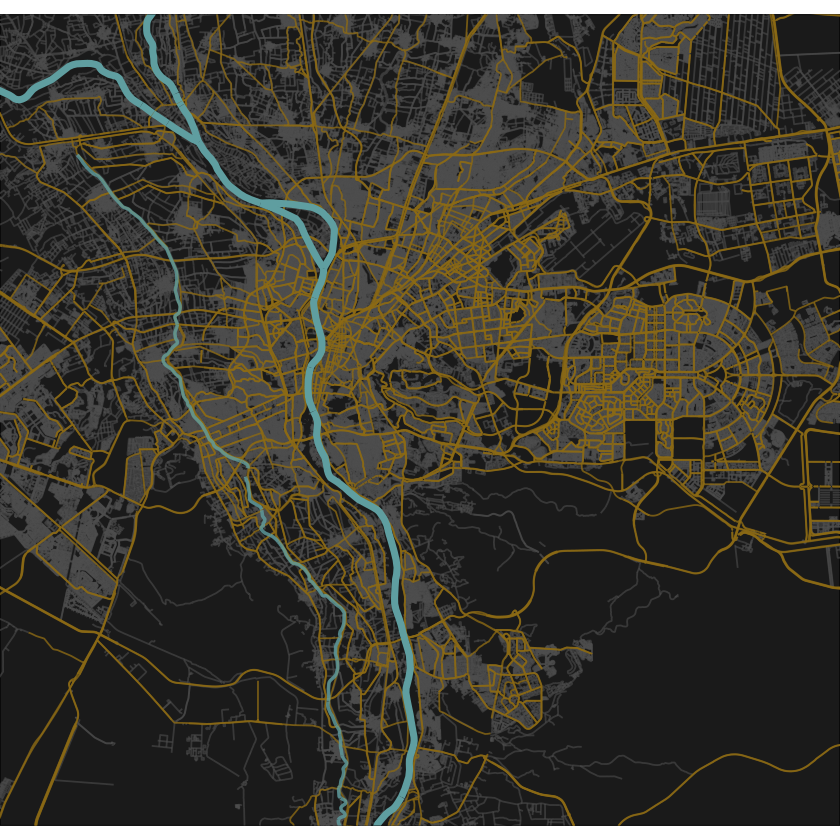

In [ ]:
map <- ggplot() +
  # small streets
  geom_sf(data = small_streets$osm_lines, alpha = .6,
          size = .2, colour = "grey30") +
  # large steets, making them stand out a bit with colour
  geom_sf(data = dus_streets$osm_lines, alpha = .8,
          size = .4, colour = "goldenrod4") +
  # small water
  geom_sf(data = small_water, alpha = .8,
          linewidth = 1, colour = "cadetblue") +

  geom_sf(data = nile, alpha = 1, linewidth = 2, colour = "cadetblue") +
  # setting limits
  coord_sf(ylim = ylimit, xlim = xlimit, expand = FALSE) +
  # adding labels
  annotate(geom = "text", y = 29.7, x = xmid,
           label = "Cairo", size = 8, colour = "grey75",
           family = "PT Sans") +
  theme_void() +
  theme(panel.background = element_rect(fill = "grey10"),
        plot.background = element_rect(fill = "grey10"))

map

Also needed the river in svg, to make it flow out of the bbox with city

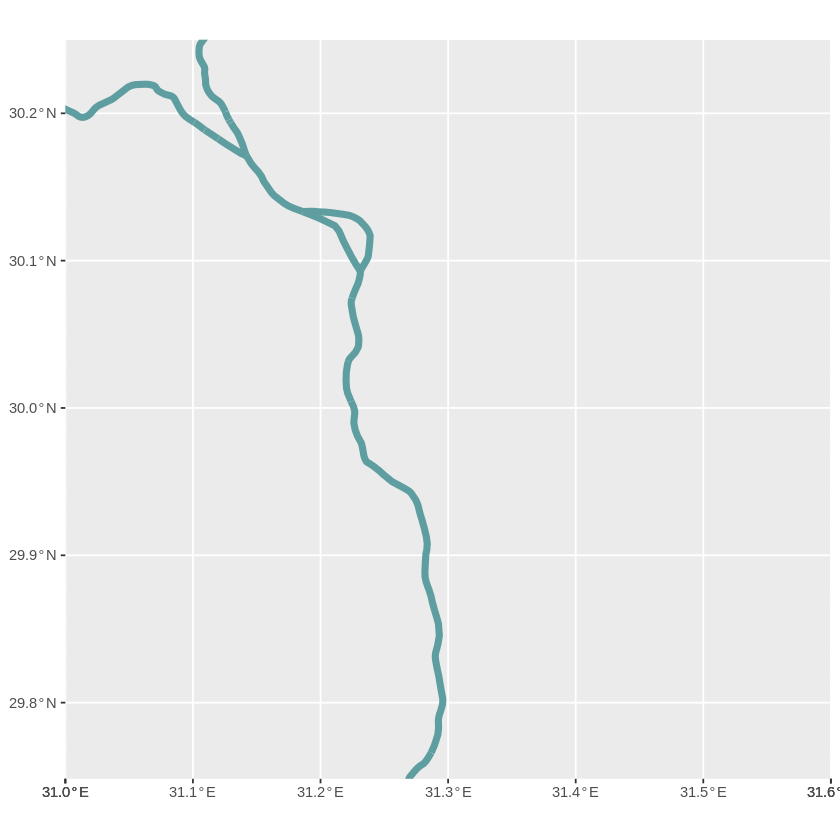

In [ ]:
map <- ggplot() +

  geom_sf(data = nile, alpha = 1, linewidth = 2, colour = "cadetblue") +
  # setting limits
  coord_sf(ylim = ylimit, xlim = xlimit, expand = FALSE)

map

Final result was made in Figma

In [ ]:
ggsave("cairo.png", device = 'png', dpi = 370)

Saving 6.67 x 6.67 in image


# Day 9. Hexagons

Dataset: https://www.kaggle.com/datasets/thedevastator/spanish-housing-dataset-location-size-price-and/data

In [ ]:
import pandas as pd

df = pd.read_csv("houses_barcelona.csv")
df.head()

ad_description  \
0  DISFRUTA DE ESTA VIVIENDA POR UNA CUOTA MENSUA...   
1                                                NaN   
2  Casa en el Pla del Diable, dispone de 3 Baños,...   
3  Suelo de parqué laminado, instalación de gas c...   
4                                                NaN   

                       ad_last_update  air_conditioner  balcony bath_num  \
0  Anuncio actualizado el 10 de abril                0        0        1   
1       más de 5 meses sin actualizar                0        0        1   
2       más de 5 meses sin actualizar                1        0        3   
3       más de 5 meses sin actualizar                1        0        2   
4       más de 5 meses sin actualizar                0        0        3   

   built_in_wardrobe  chimney                 condition  construct_date  \
0                  0        0                       NaN             NaN   
1                  0        1  segunda mano/buen estado          1960.0   
2                  0        0  segunda mano/buen estado             NaN   
3                  1        0  segunda mano/buen estado             NaN   
4                  1        0  segunda mano/buen estado             NaN   

  energetic_certif  ... m2_useful obtention_date  orientation   price  \
0              NaN  ...      55.0     2019-04-12          NaN   57000   
1      no indicado  ...     300.0     2019-04-12   norte, sur  120000   
2              NaN  ...       NaN     2019-04-12    sur, este  620000   
3       en trámite  ...       NaN     2019-04-12   sur, oeste  190000   
4       en trámite  ...     420.0     2019-04-12        norte  450000   

  reduced_mobility  room_num storage_room  swimming_pool  terrace unfurnished  
0                0         2            0              0        0         NaN  
1                0         2            1              0        1         NaN  
2                0         5            1              0        1         NaN  
3                0         3            0              0        1         NaN  
4                0         5            1              0        1         NaN  

[5 rows x 36 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_description     815 non-null    object 
 1   ad_last_update     885 non-null    object 
 2   air_conditioner    885 non-null    int64  
 3   balcony            885 non-null    int64  
 4   bath_num           885 non-null    object 
 5   built_in_wardrobe  885 non-null    int64  
 6   chimney            885 non-null    int64  
 7   condition          751 non-null    object 
 8   construct_date     213 non-null    float64
 9   energetic_certif   591 non-null    object 
 10  floor              588 non-null    object 
 11  garage             398 non-null    object 
 12  garden             885 non-null    int64  
 13  ground_size        0 non-null      float64
 14  heating            93 non-null     object 
 15  house_id           885 non-null    int64  
 16  house_type         885 non

Geocoding function, it is important and will be used later:

In [ ]:
import geocoder

def get_coords(addr):
  result = geocoder.osm(addr)
  while not result:
    addr = ', '.join(addr.split(',')[1:])
    result = geocoder.osm(addr)

  # return lat, long
  return result.osm['y'], result.osm['x']

In [ ]:
get_coords('Calle de Joan i Jaume Ràfols, 18 , Torrelavit , Alt Penedès, Barcelona')

(41.4463416, 1.7298578)

Add coordinates to addresses:

In [ ]:
df['lat'], df['lon'] = zip(*df["loc_full"].map(lambda x: get_coords(x)))

df.head()

ad_description  \
0  DISFRUTA DE ESTA VIVIENDA POR UNA CUOTA MENSUA...   
1                                                NaN   
2  Casa en el Pla del Diable, dispone de 3 Baños,...   
3  Suelo de parqué laminado, instalación de gas c...   
4                                                NaN   

                       ad_last_update  air_conditioner  balcony bath_num  \
0  Anuncio actualizado el 10 de abril                0        0        1   
1       más de 5 meses sin actualizar                0        0        1   
2       más de 5 meses sin actualizar                1        0        3   
3       más de 5 meses sin actualizar                1        0        2   
4       más de 5 meses sin actualizar                0        0        3   

   built_in_wardrobe  chimney                 condition  construct_date  \
0                  0        0                       NaN             NaN   
1                  0        1  segunda mano/buen estado          1960.0   
2                  0        0  segunda mano/buen estado             NaN   
3                  1        0  segunda mano/buen estado             NaN   
4                  1        0  segunda mano/buen estado             NaN   

  energetic_certif  ... orientation   price  reduced_mobility  room_num  \
0              NaN  ...         NaN   57000                 0         2   
1      no indicado  ...  norte, sur  120000                 0         2   
2              NaN  ...   sur, este  620000                 0         5   
3       en trámite  ...  sur, oeste  190000                 0         3   
4       en trámite  ...       norte  450000                 0         5   

  storage_room  swimming_pool terrace  unfurnished        lat       lon  
0            0              0       0          NaN  41.346382  1.699521  
1            1              0       1          NaN  41.446342  1.729858  
2            1              0       1          NaN  41.346382  1.699521  
3            0              0       1          NaN  41.440888  1.863431  
4            1              0       1          NaN  41.440012  1.865407  

[5 rows x 38 columns]

Save the file, because geocoding takes too much time

In [ ]:
df.to_csv("latlongs.csv")

In [ ]:
df["price"].min(), df["price"].max()

(28585, 5000000)

Seems that places are not in Barcelona, let's find another dataset

In [ ]:
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np

px.set_mapbox_access_token("token")

fig = ff.create_hexbin_mapbox(
    data_frame=df, lat="lat", lon="lon",
    nx_hexagon=10, opacity=0.9, labels={"color": "Average price"},
    color="price", agg_func=np.mean, color_continuous_scale="Icefire", range_color=[90000, 400000]
)
fig.show()

Dataset: https://www.kaggle.com/datasets/marshuu/rent-price-in-barcelona-2014-2022

In [ ]:
!pip install -U kaleido

In [ ]:
import pandas as pd

df = pd.read_csv("Barcelona_rent_price.csv")
df.head()

Year  Trimester      District                          Neighbourhood  \
0  2014          1  Ciutat Vella                               el Raval   
1  2014          1  Ciutat Vella                         Gothic Quarter   
2  2014          1  Ciutat Vella                         la Barceloneta   
3  2014          1  Ciutat Vella  Sant Pere, Santa Caterina i la Ribera   
4  2014          1      Eixample                             Fort Pienc   

               Average _rent   Price  
0  average rent (euro/month)  589.55  
1  average rent (euro/month)  712.79  
2  average rent (euro/month)  540.71  
3  average rent (euro/month)  673.44  
4  average rent (euro/month)  736.09

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4622 non-null   int64  
 1   Trimester      4622 non-null   int64  
 2   District       4622 non-null   object 
 3   Neighbourhood  4622 non-null   object 
 4   Average _rent  4622 non-null   object 
 5   Price          4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


Geocoding with full address:

In [ ]:
df['location'] = df['Neighbourhood'] + ', ' + df['District']

df['lat'], df['lon'] = zip(*df["location"].map(lambda x: get_coords(x)))

df.head()

In [ ]:
df['period'] = df['Year'].astype(str) + ', ' + df['Trimester'].astype(str)

Drop outliers:

In [ ]:
df = df.drop(df[df['lon'] < 2].index)
df = df.drop(df[df['lat'] < 41].index)

In [ ]:
year = 2021
typ = "average rent per surface (euro/m2)" # 'average rent (euro/month)' or 'average rent per surface (euro/m2)'
trimester =  1

for_map = df[(df['Year'] == year) & (df['Average _rent'] == typ) & (df['Trimester'] == trimester)]

In [ ]:
!mkdir images

Example of map for one trimester-year and type of cost

In [ ]:
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np

px.set_mapbox_access_token("token")


fig = ff.create_hexbin_mapbox(
    data_frame=for_map, lat="lat", lon="lon", #animation_frame='period',
    nx_hexagon=12, opacity=0.9, labels={"color": "€/m²"},
    # mapbox_style='carto-darkmatter',
    # show_original_data=True,
    # original_data_marker=dict(size=4, opacity=0.6, color="black"),
    width=800,
    height=800,
    zoom=11.4,
    center={'lat': 41.41, 'lon': 2.17},
    color="Price", agg_func=np.mean, color_continuous_scale="Icefire" #, range_color=[90000, 400000]
)

fig.update_layout(
    title={
        'text': f"Average rent cost per m² — {year}, {trimester} qtr",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="PT Sans, monospace",
        size=18,
        color="black"
    ))

fig.show()

In [ ]:
years = list(df['Year'].unique())
trims = list(df['Trimester'].unique())

Creating similar pictures for each time period

In [ ]:
for i in years:
  for j in trims:
    typ = "average rent (euro/month)" # 'average rent (euro/month)' or 'average rent per surface (euro/m2)'
    for_map = df[(df['Year'] == i) & (df['Average _rent'] == typ) & (df['Trimester'] == j)]

    fig = ff.create_hexbin_mapbox(
        data_frame=for_map, lat="lat", lon="lon",
        nx_hexagon=12, opacity=0.9, labels={"color": "€/mo"},
        width=800,
        height=800,
        zoom=11.4,
        center={'lat': 41.41, 'lon': 2.17},
        color="Price", agg_func=np.mean, color_continuous_scale="Icefire"
    )

    fig.update_layout(
      title={
          # 'text': f"Average rent cost per m² — {i}, {j} qtr",
          'text': f"Average rent cost per month — {i}, {j} qtr",
          'y':0.97,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
      font=dict(
          family="PT Sans, monospace",
          size=18,
          color="black"
    ))

    # fig.show()
    print(i, j)
    fig.write_image(f"images/{i}{j}.png")

After that, download all pictures and make gif out of them

In [ ]:
!zip -r images.zip images

from google.colab import files
files.download("images.zip")

# Day 10. North America

All was done in Mapbox Studio (temporary preview when loading layer with data), exported with a screenshot...

# Day 24. Black & White

In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name_example = "Kamppi, Helsinki, Finland"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name_example)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


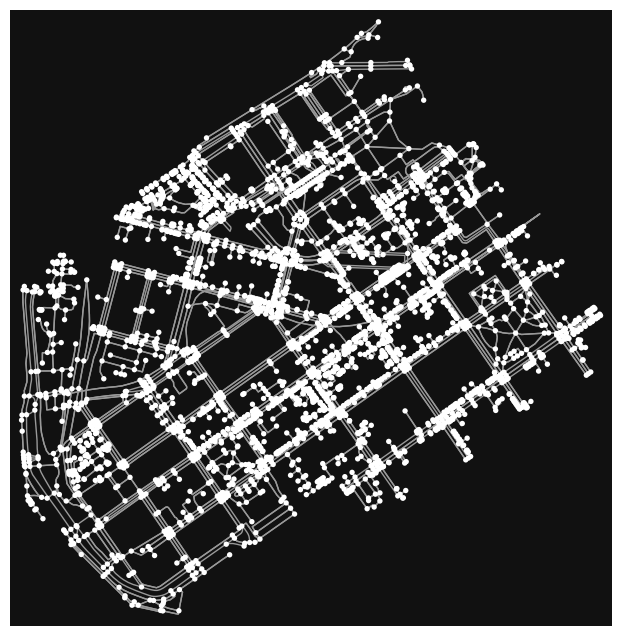

In [ ]:
fig, ax = ox.plot_graph(graph)

In [ ]:
area = ox.geocode_to_gdf(place_name_example)
buildings = ox.features_from_place(place_name_example, {'building': True})
restaurants = ox.features_from_place(place_name_example, {'amenity': ['restaurant']})
nodes, edges = ox.graph_to_gdfs(graph)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(3067)

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
restaurants = restaurants.to_crs(projection)

NameError: ignored

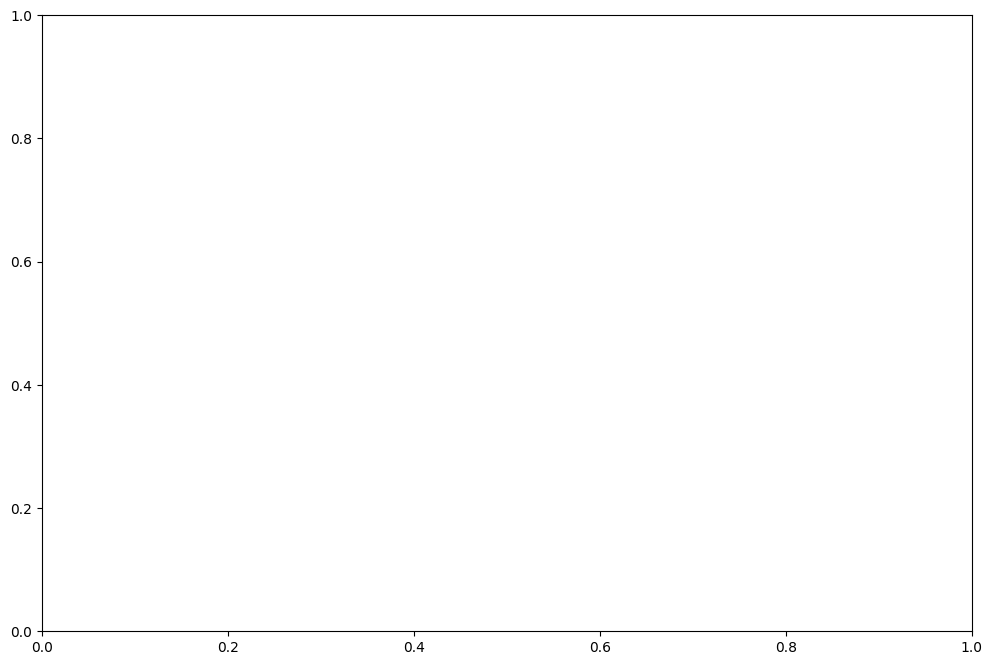

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.axis('off')
plt.tight_layout()

In [ ]:
place_name = 'Tsentralny District, Sankt Petersburg, Russia'

# area = ox.geocode_to_gdf(place_name)
buildings = ox.features_from_place(place_name, {'building': True})
# restaurants = ox.features_from_place(place_name, {'amenity': ['restaurant']})
# nodes, edges = ox.graph_to_gdfs(graph)

In [ ]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(3067)

buildings = buildings.to_crs(projection)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

buildings.plot(ax=ax, facecolor='black', alpha=1)

plt.axis('off')
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-77b75b6c5e58>:3: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place_name, tags={'building':True})


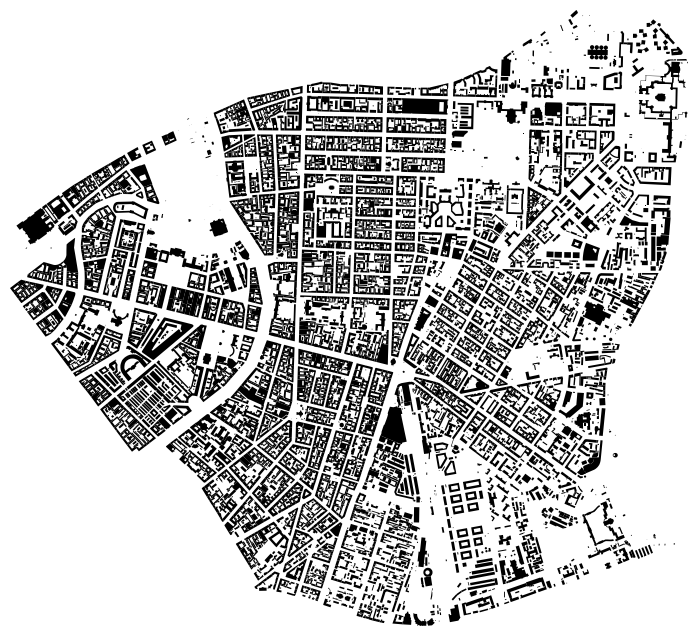

In [ ]:
import osmnx as ox

gdf = ox.geometries_from_place(place_name, tags={'building':True})
fig, ax = ox.plot_footprints(gdf, figsize=(12,8), color='black', bgcolor='white')